In [54]:
!pip install pandas_datareader

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from pandas_datareader.data import get_data_yahoo

'get_data_yahoo' has 'interval' condition. You can give 'm' to get monthly prices.

In [2]:
capm = get_data_yahoo(['AAPL', '^GSPC','^IRX'], '01/01/2010', '12/31/2019', interval='m')
capm

Attributes  Adj Close                          Close                      \
Symbols          AAPL        ^GSPC   ^IRX       AAPL        ^GSPC   ^IRX   
Date                                                                       
2010-01-01   5.908337  1073.869995  0.070   6.859286  1073.869995  0.070   
2010-02-01   6.294721  1104.489990  0.115   7.307857  1104.489990  0.115   
2010-03-01   7.229299  1169.430054  0.150   8.392857  1169.430054  0.150   
2010-04-01   8.031907  1186.689941  0.155   9.324643  1186.689941  0.155   
2010-05-01   7.902396  1089.410034  0.150   9.174286  1089.410034  0.150   
...               ...          ...    ...        ...          ...    ...   
2019-08-01  51.311405  2926.459961  1.933  52.185001  2926.459961  1.933   
2019-09-01  55.264339  2976.739990  1.770  55.992500  2976.739990  1.770   
2019-10-01  61.381241  3037.560059  1.498  62.189999  3037.560059  1.498   
2019-11-01  65.943619  3140.979980  1.540  66.812500  3140.979980  1.540   
2019-12-01  72.675339  3230.780029  1.505  73.412498  3230.780029  1.505   

Attributes       High                            Low                      \
Symbols          AAPL        ^GSPC   ^IRX       AAPL        ^GSPC   ^IRX   
Date                                                                       
2010-01-01   7.699643  1150.449951  0.080   6.794643  1071.589966  0.015   
2010-02-01   7.327500  1112.420044  0.130   6.816071  1044.500000  0.060   
2010-03-01   8.481429  1180.689941  0.160   7.337500  1105.359985  0.115   
2010-04-01   9.730714  1219.800049  0.170   8.312500  1170.689941  0.130   
2010-05-01   9.567143  1205.130005  0.170   7.116071  1040.780029  0.080   
...               ...          ...    ...        ...          ...    ...   
2019-08-01  54.507500  3013.590088  2.048  48.145000  2822.120117  1.823   
2019-09-01  56.605000  3021.989990  1.965  51.055000  2891.850098  1.700   
2019-10-01  62.437500  3050.100098  1.805  53.782501  2855.939941  1.495   
2019-11-01  67.000000  3154.260010  1.585  62.290001  3050.719971  1.480   
2019-12-01  73.492500  3247.929932  2.000  64.072502  3070.330078  1.478   

Attributes       Open                            Volume                     
Symbols          AAPL        ^GSPC   ^IRX          AAPL         ^GSPC ^IRX  
Date                                                                        
2010-01-01   7.622500  1116.560059  0.080  1.516899e+10  9.094758e+10  0.0  
2010-02-01   6.870357  1073.890015  0.060  1.077608e+10  8.456134e+10  0.0  
2010-03-01   7.348214  1105.359985  0.125  1.215417e+10  1.036836e+11  0.0  
2010-04-01   8.478929  1171.229980  0.150  1.236713e+10  1.167419e+11  0.0  
2010-05-01   9.422857  1188.579956  0.155  1.808265e+10  1.276628e+11  0.0  
...               ...          ...    ...           ...           ...  ...  
2019-08-01  53.474998  2980.320068  2.023  2.724326e+09  7.959944e+10  0.0  
2019-09-01  51.607498  2909.010010  1.930  2.170268e+09  7.399233e+10  0.0  
2019-10-01  56.267502  2983.689941  1.805  2.433211e+09  7.756455e+10  0.0  
2019-11-01  62.384998  3050.719971  1.495  1.793326e+09  7.217992e+10  0.0  
2019-12-01  66.817497  3143.850098  1.550  2.388795e+09  7.205400e+10  0.0  

[120 rows x 18 columns]

We select `Adj Close` column and rename the column to remove `^`.

In [3]:
capm = capm['Adj Close']
capm.columns = ['AAPL',"GSPC","IRX"]
capm

,AAPL,GSPC,IRX
Date,,,
2010-01-01,5.908337,1073.869995,0.070
2010-02-01,6.294721,1104.489990,0.115
2010-03-01,7.229299,1169.430054,0.150
2010-04-01,8.031907,1186.689941,0.155
2010-05-01,7.902396,1089.410034,0.150
...,...,...,...
2019-08-01,51.311405,2926.459961,1.933
2019-09-01,55.264339,2976.739990,1.770
2019-10-01,61.381241,3037.560059,1.498


We get the monthly return with the `pct_change()` method and add a suffix to the column name with `add_suffix()`. Then, we add these columns to capm DataFrame with `join()`.

`add_suffix()` suffixes labels with string suffix. 
For Series, the row labels are suffixed. For DataFrame, the column labels are suffixed.

'join()' will add newly created data to capm dataframe.

In [5]:
capm_return = capm.join(capm[['AAPL', 'GSPC']].pct_change().add_suffix('_m_return'))
capm_return

,AAPL,GSPC,IRX,AAPL_m_return,GSPC_m_return
Date,,,,,
2010-01-01,5.908337,1073.869995,0.070,NaN,NaN
2010-02-01,6.294721,1104.489990,0.115,0.065396,0.028514
2010-03-01,7.229299,1169.430054,0.150,0.148470,0.058796
2010-04-01,8.031907,1186.689941,0.155,0.111022,0.014759
2010-05-01,7.902396,1089.410034,0.150,-0.016125,-0.081976
...,...,...,...,...,...
2019-08-01,51.311405,2926.459961,1.933,-0.020184,-0.018092
2019-09-01,55.264339,2976.739990,1.770,0.077038,0.017181
2019-10-01,61.381241,3037.560059,1.498,0.110684,0.020432


In [6]:
capm_return['AAPL_rp'] = capm_return['AAPL_m_return'] - capm_return['IRX']
capm_return['GSPC_rp'] = capm_return['GSPC_m_return'] - capm_return['IRX']
capm_return

,AAPL,GSPC,IRX,AAPL_m_return,GSPC_m_return,AAPL_rp,GSPC_rp
Date,,,,,,,
2010-01-01,5.908337,1073.869995,0.070,NaN,NaN,NaN,NaN
2010-02-01,6.294721,1104.489990,0.115,0.065396,0.028514,-0.049604,-0.086486
2010-03-01,7.229299,1169.430054,0.150,0.148470,0.058796,-0.001530,-0.091204
2010-04-01,8.031907,1186.689941,0.155,0.111022,0.014759,-0.043978,-0.140241
2010-05-01,7.902396,1089.410034,0.150,-0.016125,-0.081976,-0.166125,-0.231976
...,...,...,...,...,...,...,...
2019-08-01,51.311405,2926.459961,1.933,-0.020184,-0.018092,-1.953184,-1.951092
2019-09-01,55.264339,2976.739990,1.770,0.077038,0.017181,-1.692962,-1.752819
2019-10-01,61.381241,3037.560059,1.498,0.110684,0.020432,-1.387316,-1.477568


In [7]:
capm_return['GSPC_rp'].describe()

count    119.000000
mean      -0.549273
std        0.778951
min       -2.391777
25%       -0.982820
50%       -0.103043
75%       -0.033169
max        0.102723
Name: GSPC_rp, dtype: float64

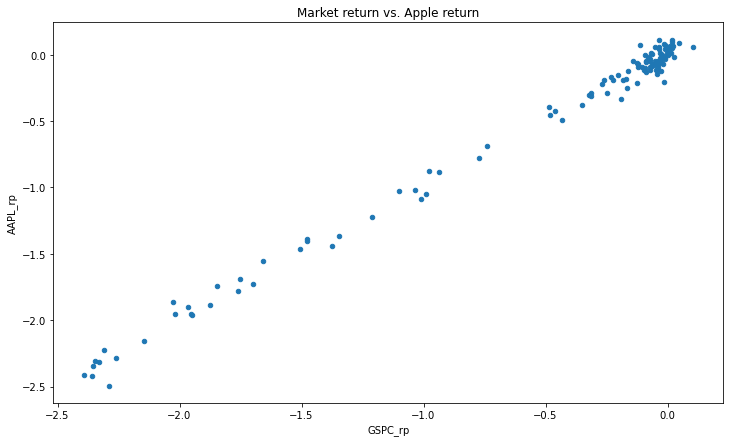

In [8]:
capm_return.plot.scatter(x='GSPC_rp', y='AAPL_rp', title='Market return vs. Apple return', figsize = (12, 7))

In [10]:
capm_lm = smf.ols("AAPL_rp ~ GSPC_rp", data=capm_return).fit()
capm_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_rp   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Tue, 16 Mar 2021   Prob (F-statistic):          2.25e-129
Time:                        07:15:55   Log-Likelihood:                 159.77
No. Observations:                 119   AIC:                            -315.5
Df Residuals:                     117   BIC:                            -310.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0133      0.007      1.864      0.065      -0.001       0.028
GSPC_rp        0.9987      0.008    132.597      0.000       0.984       1.014
==============================================================================
Omnibus:                        9.218   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.635
Skew:                          -0.437   Prob(JB):                      0.00298
Kurtosis:                       4.257   Cond. No.                         1.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
capm_return[['AAPL_rp', 'GSPC_rp']].cov()

,AAPL_rp,GSPC_rp
AAPL_rp,0.609221,0.605979
GSPC_rp,0.605979,0.606765


In [12]:
capm_lm.rsquared

0.9933894851695847

The `replot()` method will plot data and a linear regression model fit. If the `fit_reg` is set to True, it will estimate and plot a regression model relating the x and y variables.

[Text(0, 0.5, 'Apple'), Text(0.5, 0, 'Market')]

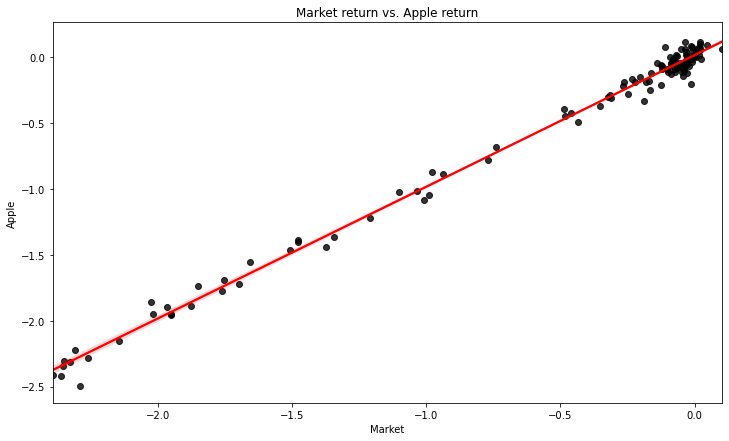

In [17]:
plt.figure(figsize=(12 ,7))
ax = sns.regplot(x= 'GSPC_rp', y='AAPL_rp', data=capm_return, fit_reg=True,
            scatter_kws={"color": "black"}, line_kws={'color':'red'})
ax.set_title("Market return vs. Apple return")
ax.set(xlabel="Market", ylabel="Apple")


Save it as a csv file.

In [18]:
capm_return.to_csv('capm_return.csv')